In [58]:
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import argparse as ap
from scipy.fftpack import fft
from scipy.fftpack import fftfreq
from scipy.stats import linregress as linregress
from scipy.signal import find_peaks as fpeaks
from scipy.signal import peak_widths as peak_widths
from scipy.fftpack import fftshift
from scipy import interpolate as spInt
import matplotlib.animation as manimation

plt.rc('text', usetex=True)

In [59]:
data = np.genfromtxt("data/spectralData1/rate_0/run_1/temporalData.csv", delimiter=',')

In [60]:
data.shape

(512, 2049)

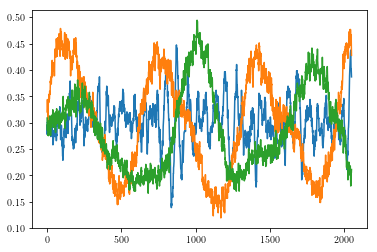

In [61]:
fig1, ax1 = plt.subplots(facecolor="white")
ax1.plot(data[30,:])
ax1.plot(data[80,:])
ax1.plot(data[180,:])

In [73]:
data2 = np.genfromtxt("data/spectralData1/rate_0/output.csv", delimiter=',')

In [74]:
data2.shape

(513, 1024)

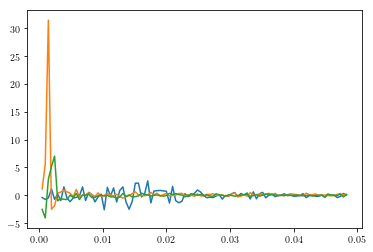

In [75]:
fig2, ax2 = plt.subplots(facecolor="white")
ax2.plot(data2[0,1:100], data2[30,1:100])
ax2.plot(data2[0,1:100], data2[80,1:100])
ax2.plot(data2[0,1:100], data2[280,1:100])

In [76]:
specdat = fft(data, n=2048, axis=-1)

In [77]:
specdat.shape

(512, 2048)

In [78]:
freq = fftfreq(2048)

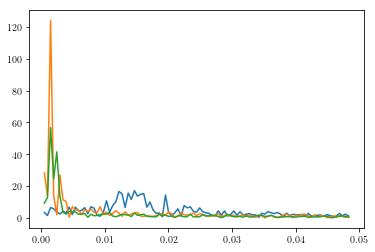

In [79]:
fig3, ax3 = plt.subplots(facecolor="white")
ax3.plot(freq[1:100], np.abs((specdat[30,1:100])))
ax3.plot(freq[1:100], np.abs((specdat[80,1:100])))
ax3.plot(freq[1:100], np.abs((specdat[280,1:100])))

In [80]:
np.argmax(np.abs(np.real(specdat[300,1:100])))

2

In [81]:
1/freq[3]

682.6666666666666

In [82]:
specdat.shape

(512, 2048)

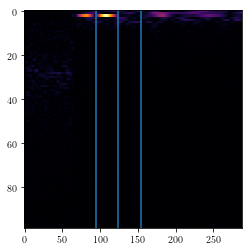

In [83]:
fig4, ax4 = plt.subplots(facecolor="white")
con = ax4.imshow(np.abs(data2[:288, 1:100]).T, cmap='inferno')
ax4.set_aspect(288/99)
ax4.axvline(94)
ax4.axvline(124)
ax4.axvline(154)

In [53]:
amp = np.zeros(512)

for i in range(512):
    amp[i] = np.max(np.abs(data2[i, 1:100]).T)

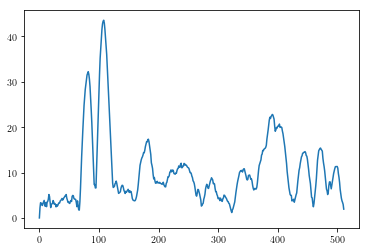

In [54]:
fig5, ax5 = plt.subplots(facecolor="white")
ax5.plot(amp)